In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('Cybersecurity_Dataset.csv')

# Display initial data information
print("Dataset Shape:", data.shape)
print("Column Info:")
print(data.info())
print("\nFirst few rows:")
print(data.head())

# Step 1: Data Cleaning
# Drop any completely empty rows or columns
data.dropna(how='all', axis=0, inplace=True)
data.dropna(how='all', axis=1, inplace=True)

# Handle missing values in each column
# Using SimpleImputer with "most_frequent" or "mean" depending on data type
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Impute numeric features with mean
imputer_numeric = SimpleImputer(strategy='mean')
data[numeric_features] = imputer_numeric.fit_transform(data[numeric_features])

# Impute categorical features with the most frequent value
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_features] = imputer_categorical.fit_transform(data[categorical_features])

# Step 2: Encoding Categorical Variables
# Encode categorical features as numeric if necessary
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le  # Save the encoder for inverse transformation if needed

# Step 3: Feature Scaling
# Standardize the numeric features
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Step 4: Define Features and Target
# Assuming the target variable is named 'target_column'
X = data.drop('Attack Vector', axis=1)  # Features
y = data['Severity Score']                # Target

# Step 5: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Dataset Shape: (1100, 15)
Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Threat Category                  1100 non-null   object 
 1   IOCs (Indicators of Compromise)  1100 non-null   object 
 2   Threat Actor                     1100 non-null   object 
 3   Attack Vector                    1100 non-null   object 
 4   Geographical Location            1100 non-null   object 
 5   Sentiment in Forums              1100 non-null   float64
 6   Severity Score                   1100 non-null   int64  
 7   Predicted Threat Category        1100 non-null   object 
 8   Suggested Defense Mechanism      1100 non-null   object 
 9   Risk Level Prediction            1100 non-null   int64  
 10  Cleaned Threat Description       1100 non-null   object 
 11  Keyword Extraction               1100 non-n

In [6]:
import numpy as np

# Define bins to convert continuous target values to categories (adjust bins as needed)
# Here, we assume binary classification with a threshold (e.g., 0.5)
y_train = np.where(y_train > 0.5, 1, 0)
y_test = np.where(y_test > 0.5, 1, 0)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model for regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Model Performance Metrics:
Mean Squared Error: 0.0
R-squared: 1.0


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Binning continuous values for classification
y_train_class = np.where(y_train > 0.5, 1, 0)  # Modify threshold as needed
y_test_class = np.where(y_test > 0.5, 1, 0)

# Initialize and train the Random Forest model for classification
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train_class)

# Make predictions and evaluate
y_pred_class = rf_classifier.predict(X_test)

print("Classification Metrics:")
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("Precision:", precision_score(y_test_class, y_pred_class))
print("Recall:", recall_score(y_test_class, y_pred_class))
print("F1 Score:", f1_score(y_test_class, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))

Classification Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       115

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



In [10]:
from sklearn.svm import SVC

# Binning continuous values for classification
y_train_svm_class = np.where(y_train > 0.5, 1, 0)  # Modify threshold as needed
y_test_svm_class = np.where(y_test > 0.5, 1, 0)

# Initialize and train the SVM model for classification
svm_classifier = SVC(kernel='linear', random_state=42)  # 'linear' kernel, can try 'rbf', etc.
svm_classifier.fit(X_train, y_train_svm_class)

# Make predictions and evaluate
y_pred_svm_class = svm_classifier.predict(X_test)

print("SVM Classification Metrics:")
print("Accuracy:", accuracy_score(y_test_svm_class, y_pred_svm_class))
print("Precision:", precision_score(y_test_svm_class, y_pred_svm_class))
print("Recall:", recall_score(y_test_svm_class, y_pred_svm_class))
print("F1 Score:", f1_score(y_test_svm_class, y_pred_svm_class))
print("\nClassification Report:\n", classification_report(y_test_svm_class, y_pred_svm_class))

SVM Classification Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       115

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



In [11]:
from sklearn.svm import SVR

# Initialize and train the SVM model for regression
svm_regressor = SVR(kernel='linear')  # 'linear' kernel, can try 'rbf', etc.
svm_regressor.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_svm_reg = svm_regressor.predict(X_test)

print("SVM Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_svm_reg))
print("R-squared:", r2_score(y_test, y_pred_svm_reg))

SVM Regression Metrics:
Mean Squared Error: 0.060722158123184454
R-squared: 0.7325523551217477


Dataset Summary:
       Threat Category IOCs (Indicators of Compromise) Threat Actor  \
count             1100                            1100         1100   
unique               4                               5            4   
top           Phishing                ['123.456.78.9']       APT-28   
freq               296                             224          288   
mean               NaN                             NaN          NaN   
std                NaN                             NaN          NaN   
min                NaN                             NaN          NaN   
25%                NaN                             NaN          NaN   
50%                NaN                             NaN          NaN   
75%                NaN                             NaN          NaN   
max                NaN                             NaN          NaN   

       Attack Vector Geographical Location  Sentiment in Forums  \
count           1100                  1100          1100.000000

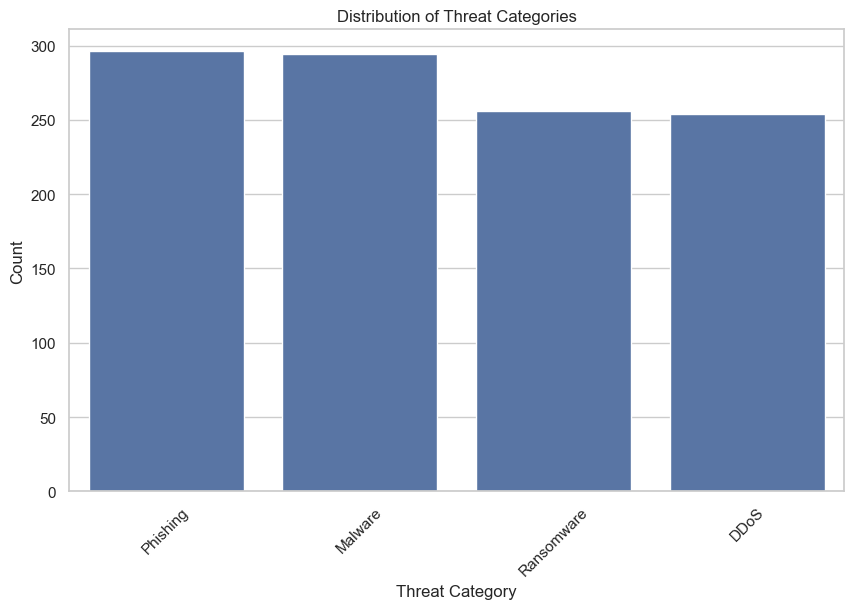

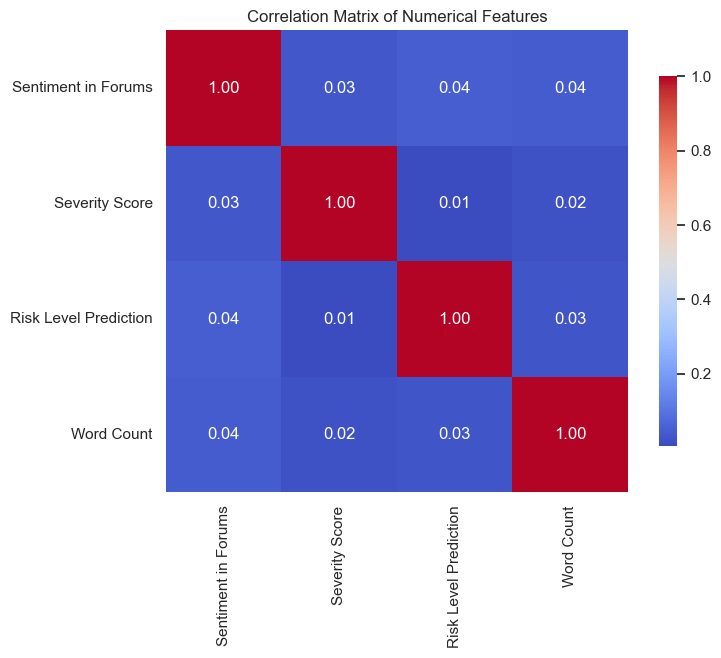

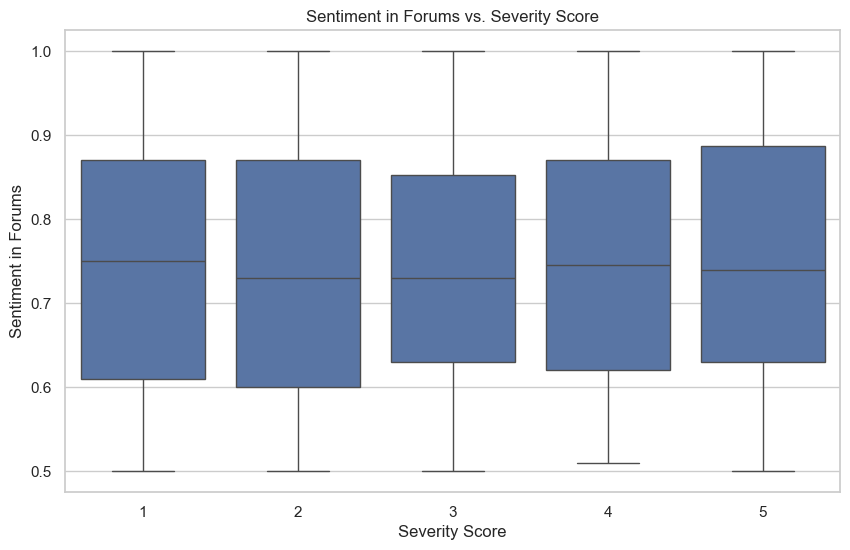

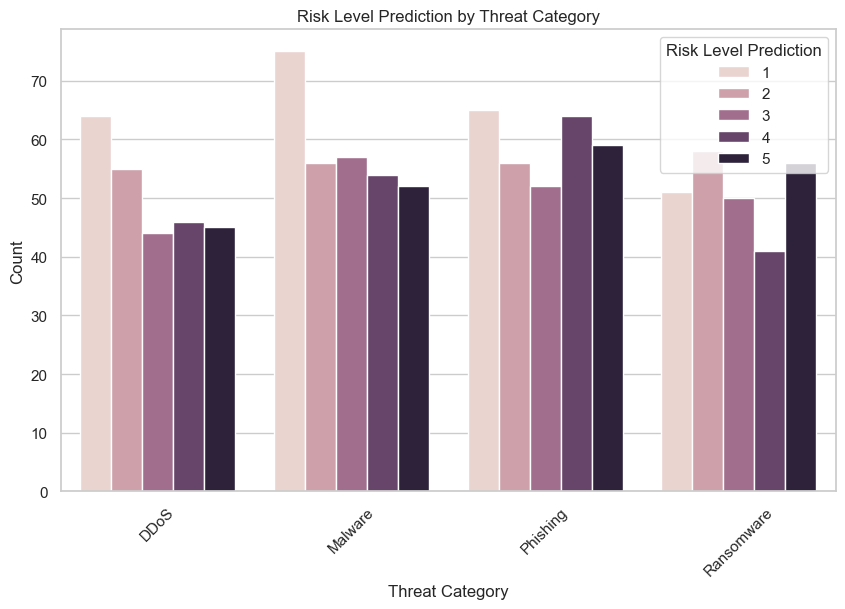

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization styles
sns.set(style="whitegrid")

data = pd.read_csv('Cybersecurity_Dataset.csv')

# 1. Data Summary
print("Dataset Summary:")
print(data.describe(include='all'))

# 2. Distribution of Threat Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Threat Category', order=data['Threat Category'].value_counts().index)
plt.title('Distribution of Threat Categories')
plt.xticks(rotation=45)
plt.xlabel('Threat Category')
plt.ylabel('Count')
plt.show()

# 3. Correlation Analysis
# Correlation matrix for numerical features
correlation_matrix = data[['Sentiment in Forums', 'Severity Score', 'Risk Level Prediction', 'Word Count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 4. Sentiment Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Severity Score', y='Sentiment in Forums')
plt.title('Sentiment in Forums vs. Severity Score')
plt.xlabel('Severity Score')
plt.ylabel('Sentiment in Forums')
plt.show()

# 5. Risk Level Prediction by Threat Category
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Threat Category', hue='Risk Level Prediction')
plt.title('Risk Level Prediction by Threat Category')
plt.xlabel('Threat Category')
plt.ylabel('Count')
plt.legend(title='Risk Level Prediction')
plt.xticks(rotation=45)
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset
file_path = 'Cybersecurity_Dataset.csv'
cybersecurity_data = pd.read_csv('cybersecurity_dataset.csv')

# Encode the target variable
label_encoder = LabelEncoder()
cybersecurity_data['Threat Category Encoded'] = label_encoder.fit_transform(cybersecurity_data['Threat Category'])

# Drop the original target column
X = cybersecurity_data.drop(columns=['Threat Category', 'Threat Category Encoded'])
y = cybersecurity_data['Threat Category Encoded']

# Drop any non-numeric columns
X = X.select_dtypes(include=[float, int])  # Select only numerical columns

# Optionally, if you need some non-numeric columns, apply encoding here:
# X = pd.get_dummies(X, drop_first=True)

# Handle missing values (fill with median or drop as necessary)
X.fillna(X.median(), inplace=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.23333333333333334

Classification Report:
               precision    recall  f1-score   support

        DDoS       0.23      0.18      0.20        79
     Malware       0.25      0.31      0.27        81
    Phishing       0.26      0.25      0.26        91
  Ransomware       0.19      0.19      0.19        79

    accuracy                           0.23       330
   macro avg       0.23      0.23      0.23       330
weighted avg       0.23      0.23      0.23       330



In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset
file_path = 'Cybersecurity_Dataset.csv'
cybersecurity_data = pd.read_csv('cybersecurity_dataset.csv')

# Encode the target variable
label_encoder = LabelEncoder()
cybersecurity_data['Threat Category Encoded'] = label_encoder.fit_transform(cybersecurity_data['Threat Category'])

# Drop the original target column
X = cybersecurity_data.drop(columns=['Threat Category', 'Threat Category Encoded'])

# Drop any non-numeric columns
X = X.select_dtypes(include=[float, int])  # Select only numerical columns
y = cybersecurity_data['Threat Category Encoded']

# Handle missing values (fill with median or drop as necessary)
X.fillna(X.median(), inplace=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Display the results
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\s


Model: Logistic Regression
Accuracy: 0.25757575757575757
Precision: 0.13502490660024907
Recall: 0.25757575757575757
F1 Score: 0.1759700660775416

Classification Report:
               precision    recall  f1-score   support

        DDoS       0.00      0.00      0.00        79
     Malware       0.25      0.57      0.35        81
    Phishing       0.27      0.43      0.33        91
  Ransomware       0.00      0.00      0.00        79

    accuracy                           0.26       330
   macro avg       0.13      0.25      0.17       330
weighted avg       0.14      0.26      0.18       330


Model: Random Forest
Accuracy: 0.23333333333333334
Precision: 0.2325730973280538
Recall: 0.23333333333333334
F1 Score: 0.2313210446544825

Classification Report:
               precision    recall  f1-score   support

        DDoS       0.23      0.18      0.20        79
     Malware       0.25      0.31      0.27        81
    Phishing       0.26      0.25      0.26        91
  Ransomware 

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\s

In [31]:
# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],            # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                 # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                   # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2', None],          # Number of features to consider for best split
    'bootstrap': [True, False]                       # Whether bootstrap samples are used when building trees
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up the random search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   n_iter=50, cv=5, scoring='f1', verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Display the best parameters found
print("Best Hyperparameters:", random_search.best_params_)

# Train the Random Forest model with the best parameters
best_rf_model = random_search.best_estimator_

# Predict on the test set using the tuned model
y_pred_best = best_rf_model.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='binary')
recall = recall_score(y_test, y_pred_best, average='binary')
f1 = f1_score(y_test, y_pred_best, average='binary')

print("\nTuned Model Performance Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': True}


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

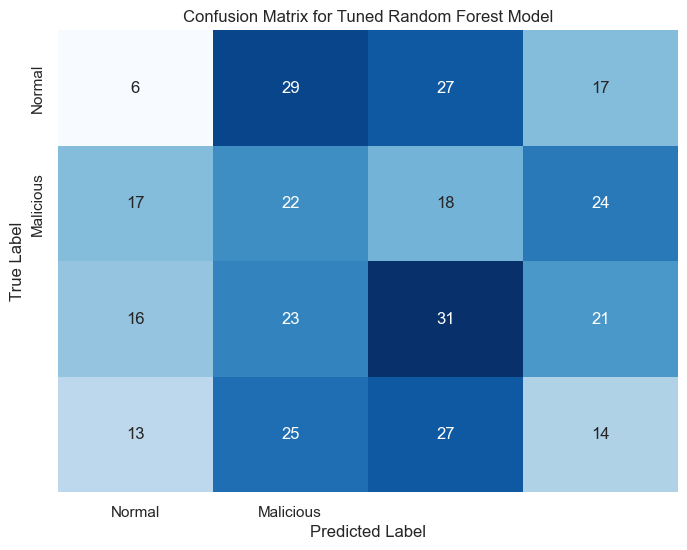

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Normal', 'Malicious'], yticklabels=['Normal', 'Malicious'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Tuned Random Forest Model")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16008\2216637997.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


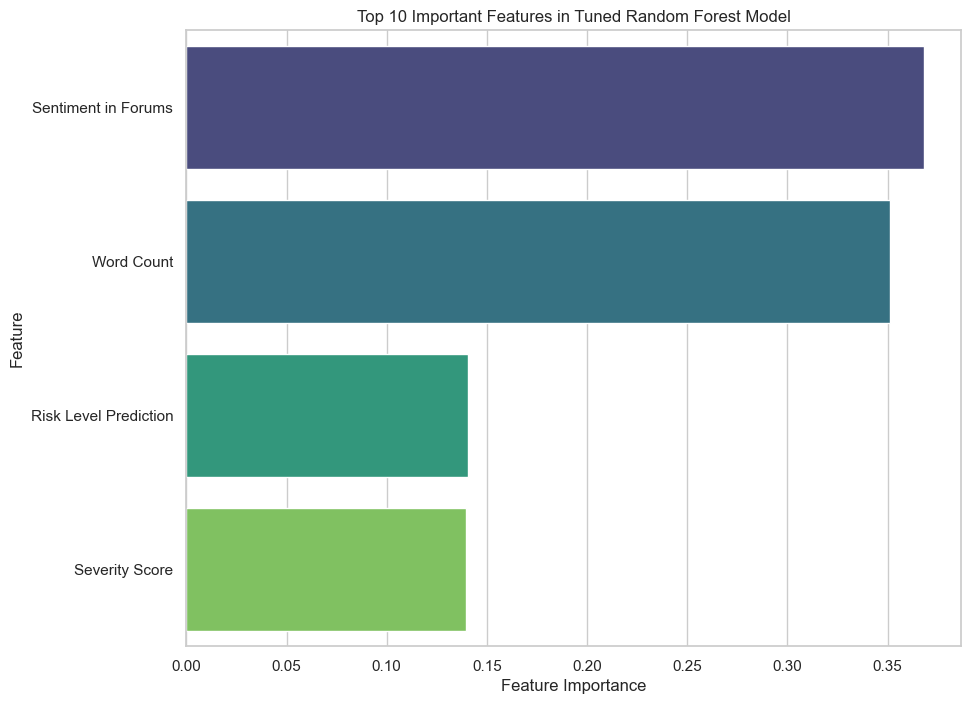

In [34]:
# Get feature importances from the best model
importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features in Tuned Random Forest Model")
plt.show()

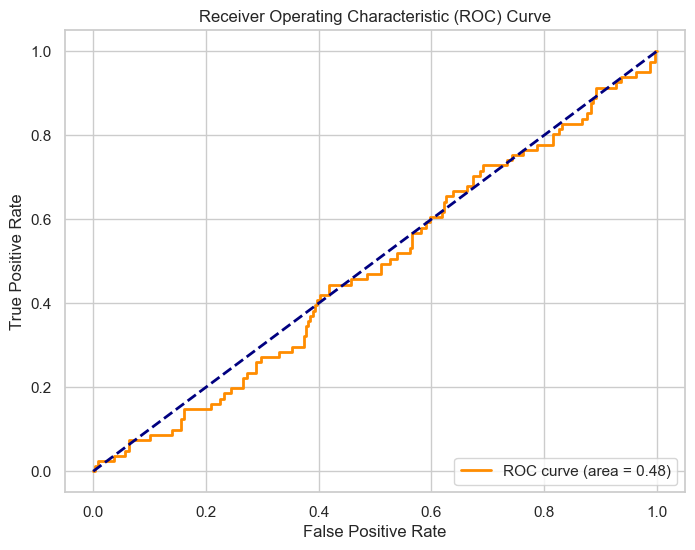

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Check if the labels are already binary; if not, convert to binary format
if len(set(y_test)) > 2:
    # Convert to binary by selecting only one class as the positive case
    y_test_bin = (y_test == 1).astype(int)  # Adjust 1 based on your positive class label
else:
    y_test_bin = y_test  # Use directly if already binary

# Predict probabilities for the positive class
y_prob_best = best_rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score for binary classification
fpr, tpr, thresholds = roc_curve(y_test_bin, y_prob_best)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.28      0.52      0.37        81
           2       0.29      0.46      0.36        91
           3       0.31      0.13      0.18        79

    accuracy                           0.28       330
   macro avg       0.22      0.28      0.23       330
weighted avg       0.22      0.28      0.23       330



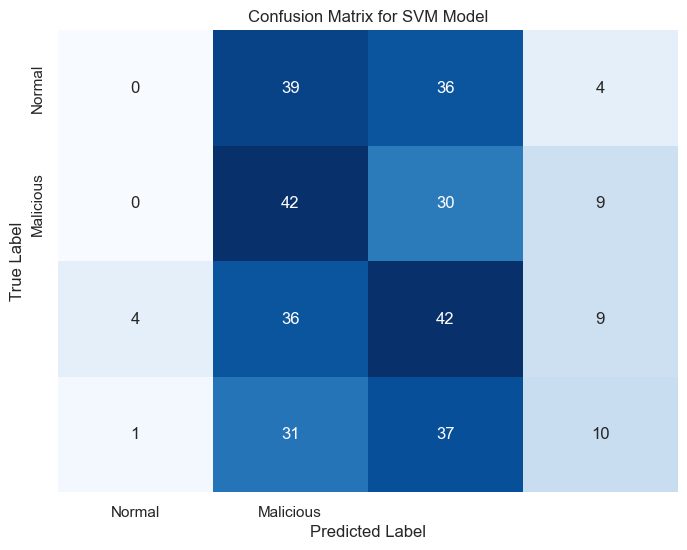

ValueError: multiclass format is not supported

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Normal', 'Malicious'], yticklabels=['Normal', 'Malicious'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM Model")
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve - SVM Model")
plt.legend(loc="lower right")
plt.show()

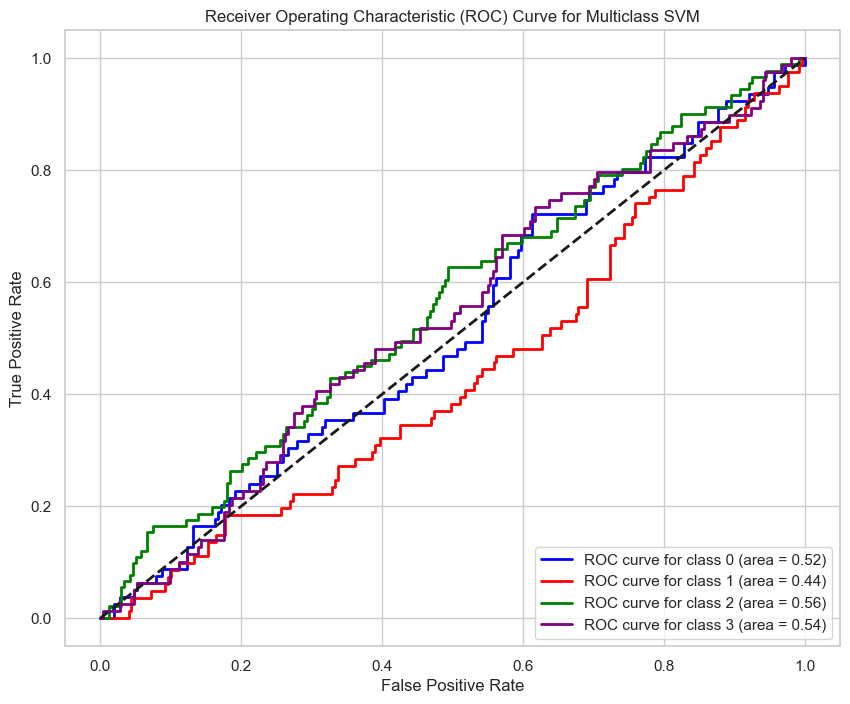

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output for multiclass (one-hot encoding)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Use the OneVsRestClassifier wrapper for multiclass ROC
svm_model_ovr = OneVsRestClassifier(SVC(kernel='rbf', probability=True, random_state=42))
svm_model_ovr.fit(X_train_scaled, label_binarize(y_train, classes=np.unique(y_train)))
y_score = svm_model_ovr.decision_function(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ["blue", "red", "green", "purple", "orange"]

for i, color in zip(range(n_classes), colors[:n_classes]):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"ROC curve for class {i} (area = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for Multiclass SVM")
plt.legend(loc="lower right")
plt.show()